In [1]:
# Dependencies and Setup
#Aref HW6 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import csv

output_path = os.path.join("..", "output", "new.csv")

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "city_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_data = []
temp_data= []
id_data = []
humidity = []
wind_speed = []
cloudy = []
lat_data = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#for x in range(len(cities)):
  #print (cities[x])

10

In [3]:
#* Perform a weather check on each of the cities using a series of successive API calls.
#* Include a print log of each city as it's being processed with the city number and city name.
#* Save both a CSV of all data retrieved and png images for each scatter plot.

#As final considerations:

#* You must complete your analysis using a Jupyter notebook.
#* You must use the Matplotlib or Pandas plotting libraries.
#* You must include a written description of three observable trends based on the data.
#* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
#* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [4]:
api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

for x in range(len(cities)):
    query_url = url + "&q=" + cities[x]
    #create a list and append city data to the list
    weather_response = requests.get(query_url).json()
    print (weather_response)
    city_data.append(weather_response['name'])
    temp_data.append(weather_response['main']['temp'])
    id_data.append(weather_response['id'])
    humidity.append(weather_response['main']['temp']) 
    wind_speed.append(weather_response['wind']['speed'])
    cloudy.append(weather_response['clouds']['all'])
    lat_data.append(weather_response['coord']['lat'])
    
    
for x  in range (len(cities)):
   print(f"Given info is: name {city_data[x]} - temp: {temp_data[x]} - windspeed: {wind_speed[x]} - humidity: {humidity[x]} - lat:{lat_data[x]}")

    
    

{'coord': {'lon': -65.75, 'lat': -19.59}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 51.7, 'pressure': 633.62, 'humidity': 30, 'temp_min': 51.7, 'temp_max': 51.7, 'sea_level': 1023.04, 'grnd_level': 633.62}, 'wind': {'speed': 6.17, 'deg': 319.5}, 'clouds': {'all': 8}, 'dt': 1530994190, 'sys': {'message': 0.0036, 'country': 'BO', 'sunrise': 1530961082, 'sunset': 1531000693}, 'id': 3907584, 'name': 'Potosi', 'cod': 200}
{'coord': {'lon': 137.08, 'lat': 36.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1011, 'humidity': 100, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1530990000, 'sys': {'type': 1, 'id': 7567, 'message': 0.0047, 'country': 'JP', 'sunrise': 1530906009, 'sunset': 1530958378}, 'id': 1849876, 'name': 'Yamada', 'cod':

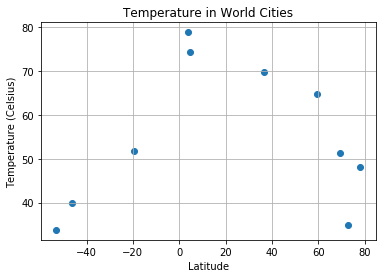

In [5]:
# Build a scatter plot for each data type
#* Temperature (F) vs. Latitude
#* Humidity (%) vs. Latitude
#* Cloudiness (%) vs. Latitude
#* Wind Speed (mph) vs. Latitude
plt.scatter(lat_data, temp_data, marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

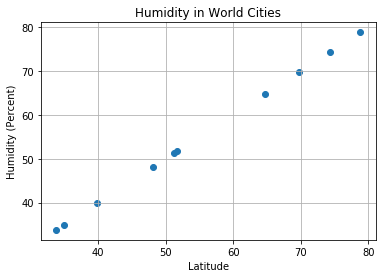

In [6]:
plt.scatter(humidity, temp_data, marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (Percent)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

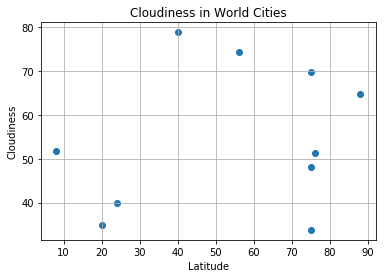

In [7]:
plt.scatter(cloudy, temp_data, marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

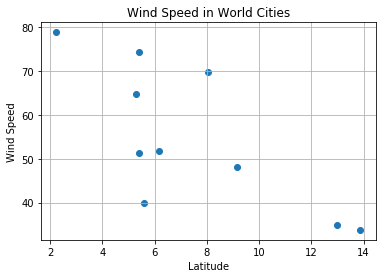

In [8]:
plt.scatter(wind_speed, temp_data, marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

In [11]:
# Open the file using "write" mode. Specify the variable to hold the contents

final = zip(city_data, id_data, temp_data, humidity, wind_speed, cloudy, lat_data)


with open(output_data_file, 'w', newline='') as csvfile:

    # Initialize csv.writer
    csvwriter = csv.writer(csvfile, delimiter=',')

    # Write the first row (column headers)
    csvwriter.writerow(['City', 'City ID', 'Temperature', 'Humidity', 'Wind Speed', 'Cloudiness', 'Latitude'])
    
    # Write the data rows
    csvwriter.writerow(final)
